In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem


In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "Pymaceuticals_data_clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [5]:
mouse_drug_data .head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
clinical_data_complete = pd.merge(mouse_drug_data,clinical_trial_data, how="left", on=["Mouse ID"])
clinical_data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [8]:
 # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_data = clinical_data_complete[["Drug","Timepoint","Tumor Volume (mm3)"]]

In [61]:
drug_data_group  = drug_data.groupby(["Drug","Timepoint"])

In [63]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
for volumen in clinical_data_complete:
    standar_error_tumar = drug_data_group.sem()
    
# Convert to DataFrame
# Preview DataFrame    
standar_error_tumar.head(20)
#type(standar_error_tumar)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358

In [82]:
# Minor Data Munging to Re-Format the Data Frames
drug_data_reformat = drug_data.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
drug_data_reformat = drug_data_reformat.rename(columns={"Tumor Volume (mm3)":"Tumor_Volume_mm3"})


print(drug_data_reformat)

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

In [65]:
subset = drug_data_reformat.sample(10)

In [66]:
sample = drug_data_reformat.sample(10)

In [67]:
drug_set = [drug_data_reformat.sample(10) for x in range(0,10)]

In [68]:
# Generate the Plot (with Error Bars)
means = [sample.Tumor_Volume_mm3.mean() for sample in drug_data_reformat]
standard_errors = standar_error_tumar
x_axis = np.arange(0, len(drug_set), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(drug_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("drug")
ax.set_ylabel("Mean")
plt.show()

AttributeError: 'str' object has no attribute 'Tumor_Volume_mm3'

NameError: name 'scatter' is not defined

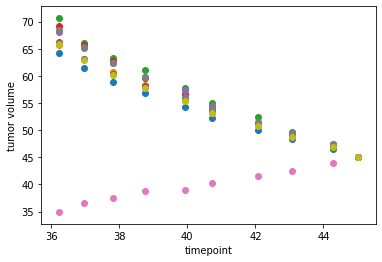

In [72]:
#Creating a scatter plot that shows how the tumor volume changes over time for each treatmen
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,1])
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,2])
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,3])
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,4])
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,5])
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,6])
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,7])
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,8])
plt.scatter(drug_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,9])

plt.xlabel('timepoint')
plt.ylabel('tumor volume')

legend2 = ax.legend(*scatter.legend_elements(drug_data_reformat["Drug"]),
                    loc="higher right", title="Drug")
plt.show()

In [74]:
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
metastatic_data = clinical_data_complete[["Drug","Timepoint","Metastatic Sites"]]

In [75]:
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
metastatic_data_reformat = metastatic_data.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")

print(metastatic_data_reformat)

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   
25          0.818182  1.500000   1.277778  1.631579  1.500000  1.941176   
30          1.090909  1.937500   1.588235  2.055556  2.066667  2.266667   
35          1.181818  2.071429   1.666667  2.294118  2.266667  2.642857   
40          1.380952  2.357143   2.100000  2.733333  2.466667  3.166667   
45          1.476190  2.692308   2.111111  3.363636  2.538462  3.272727   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                     

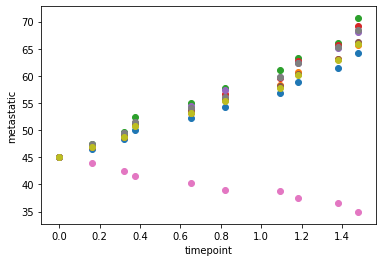

In [76]:
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,1])
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,2])
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,3])
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,4])
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,5])
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,6])
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,7])
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,8])
plt.scatter(metastatic_data_reformat.iloc[:,0],drug_data_reformat.iloc[:,9])

plt.xlabel('timepoint')
plt.ylabel('metastatic')


plt.show()

In [96]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

mice_data = clinical_data_complete[["Drug","Timepoint","Mouse ID"]]


mice_data_reformat = mice_data.pivot_table("Mouse ID", ["Timepoint"], "Drug")

print(mice_data_reformat)

DataError: No numeric types to aggregate

In [ ]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [ ]:
#Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.